
### **Business Understanding:**

In the domain of the film industry, the sentiment analysis model for movie reviews serves as a vital tool for understanding and leveraging public perception. By accurately classifying movie reviews as positive or negative, the model empowers stakeholders to gain valuable insights into audience preferences and sentiments. These insights play a pivotal role in various aspects of the film industry, from audience perception and marketing strategy enhancement to decision-making for investments and competitive analysis.

- **Audience Perception:** Understanding how audiences perceive specific movies is crucial for movie producers and distributors. The sentiment analysis model aids in comprehending audience sentiments, guiding the refinement of future productions to align with audience expectations and preferences.

- **Marketing Strategy Enhancement:** Film marketers can utilize the sentiment analysis model to craft more effective marketing campaigns. By understanding public sentiment, they can tailor promotional efforts, highlighting positive reviews and mitigating the impact of negative ones, thereby maximizing the film's visibility and reception.

- **Decision-Making for Investments:** The sentiment analysis model provides valuable data for investors in the film industry, assisting them in making informed decisions about which movies to back financially, based on predicted public reception. This can lead to more strategic investment and potentially higher returns.

- **Competitive Analysis:** Understanding public sentiment allows stakeholders to conduct competitive analyses. By comparing audience reactions to their own films with those of competitors, they can identify unique selling points and areas for improvement, fostering a competitive edge in the industry.

- **Enhanced Customer Experience:** Leveraging insights from the sentiment analysis model can lead to an enhanced movie-watching experience for audiences. Filmmakers can produce content that resonates better with their target audience, resulting in more engaging and satisfying movie experiences.

- **Cultural Impact Assessment:** The sentiment analysis model contributes to understanding the cultural impact of movies. It helps gauge the resonance of films with different demographics and communities, enabling stakeholders to create content that is more inclusive and reflective of diverse audience perspectives.

By integrating the sentiment analysis model into their decision-making processes, stakeholders can make more informed decisions, effectively tailor their strategies, and enhance the overall movie experience for audiences.

In [2]:
!git clone https://github.com/Israel-Anaba/Movie_Review_Analysis.git

Cloning into 'Movie_Review_Analysis'...
remote: Enumerating objects: 2672, done.
remote: Counting objects: 100% (1181/1181), done.
remote: Compressing objects: 100% (1071/1071), done.
remote: Total 2672 (delta 122), reused 851 (delta 101), pack-reused 1491
Receiving objects: 100% (2672/2672), 37.91 MiB | 18.57 MiB/s, done.
Resolving deltas: 100% (218/218), done.


### **Data** **Understanding and Exploration**

We begin by loading the dataset containing movie reviews. The dataset includes text reviews and corresponding sentiment labels. Before analysis, we preprocess the text data by converting it to lowercase, removing special characters, URLs, and user mentions. We also perform lemmatization to ensure that words are reduced to their base form. Additionally, we eliminate stopwords to focus on meaningful content.

We conduct exploratory data analysis (EDA) to gain insights into the dataset. This includes visualizations of sentiment distributions, word clouds for frequent words in positive and negative reviews, as well as the distribution of review lengths. These visualizations provide an understanding of the data's characteristics and help identify patterns and trends.

In [3]:
%cd Movie_Review_Analysis

/content/Movie_Review_Analysis


**Package Installation and Importing Libraries**

In [4]:
!pip install datasets
!pip install torch
!pip install transformers
!pip install huggingface_hub
!pip install accelerate>=0.20.1
!pip install transformers[torch]
!pip install wordcloud
!pip install collections-extended
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 517.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import string
import re
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import accelerate
import sys
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, BertConfig
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import Trainer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from datasets import load_metric
from sklearn.metrics import mean_squared_error
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from huggingface_hub import notebook_login
import warnings
warnings.filterwarnings("ignore")

**Download Essential Resources from NLTK Library**



- **Punkt Tokenizer Models (punkt):** Pre-trained models for text tokenization into sentences and words, crucial for various NLP tasks.
- **WordNet (wordnet):** A comprehensive lexical database providing synonym sets, word definitions, and semantic relationships.
- **Stopwords Corpus (stopwords):** Commonly used stopwords in English, often removed during text analysis preprocessing to enhance data quality and reduce noise.

In [6]:
# Download NLTK resources

# Download the Punkt Tokenizer Models, which are pre-trained models for tokenizing text into sentences and words.
nltk.download('punkt')

# Download the WordNet resource, which is a large lexical database of English providing various language-related information.
nltk.download('wordnet')

# Download the Stopwords Corpus, which contains commonly used stopwords in the English language. Stopwords are words that are often removed from text during preprocessing.
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


In this Python function, `remove_stopwords`,we take a text input as a parameter and processes it to remove any stopwords present in the text. Stopwords are commonly occurring words that are often filtered out during text preprocessing as they may not contribute significant meaning to the overall analysis. The function first tokenizes the input text into individual words using the `word_tokenize` function. Then, it filters out any words that exist in the `stop_words` list, and finally returns the remaining words as a string joined with spaces.

In [7]:
def remove_stopwords(text):
    words = word_tokenize(text)  # Tokenize the input text into individual words
    filtered_words = [word for word in words if word not in stop_words]  # Exclude words that are present in the stop_words list
    return ' '.join(filtered_words)  # Return the filtered words as a string


In [8]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

**Loading and Preprocessing Data**

In [9]:
# Load the dataset and display some values
df = pd.read_csv('/content/Movie_Review_Analysis/Assets/Train.csv')  # Read the 'Train.csv' file into a pandas DataFrame called df
test = pd.read_csv('/content/Movie_Review_Analysis/Assets/Test.csv')  # Read the 'Test.csv' file into a pandas DataFrame called test


In [10]:
df.head() #display the first few rows of the DataFrame

,review_file,content,sentiment
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive
1,9693_8.txt,I was very surprised with this film. I was tou...,positive
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive


In [11]:
test.head() #display the first few rows of the Test DataFrame

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."


In [12]:
df.rename(columns={'content': 'review'}, inplace=True) #rename the column named 'content' to 'review'

In [13]:
df['sentiment'].nunique #determine the number of unique values in the 'sentiment' column of the DataFrame df

<bound method IndexOpsMixin.nunique of 0        positive
1        positive
2        negative
3        positive
4        positive
           ...   
24995    negative
24996    positive
24997    positive
24998    negative
24999    positive
Name: sentiment, Length: 25000, dtype: object>

In [14]:
df.drop('review_file', axis=1, inplace=True) #drop the 'review_file' column from the DataFrame df along the specified axis

In [15]:
df.head() #display the first few rows of the DataFrame to check if changes are effected

,review,sentiment
0,Recently shown on cable tv the movie opens wit...,positive
1,I was very surprised with this film. I was tou...,positive
2,"Now, I'm one to watch movies that got poor rev...",negative
3,"This film came out 12 years years ago, and was...",positive
4,"When an orphanage manager goes on vacation, hi...",positive


In [16]:
# convert the 'safe_text' column to lowercase
df['review'] = df['review'].str.lower()

In [17]:
df #display the rows of the DataFrame

,review,sentiment
0,recently shown on cable tv the movie opens wit...,positive
1,i was very surprised with this film. i was tou...,positive
2,"now, i'm one to watch movies that got poor rev...",negative
3,"this film came out 12 years years ago, and was...",positive
4,"when an orphanage manager goes on vacation, hi...",positive
...,...,...
24995,"as with most of the reviewers, i saw this on s...",negative
24996,a have a female friend who is currently being ...,positive
24997,like a streetcar named desire (also directed b...,positive
24998,"as a native film professor, i can honestly say...",negative


**Data Exploration**


This visualization aids in understanding the overall distribution of sentiments within the dataset.

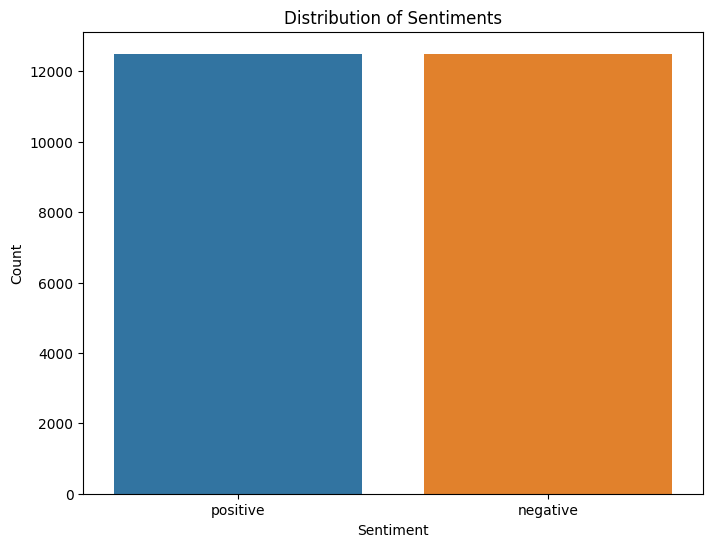

In [18]:
# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))  # Create a figure with a specific size for the plot
sns.countplot(x='sentiment', data=df)  # Plot the count of each sentiment category using the Seaborn countplot
plt.title('Distribution of Sentiments')  # Set the title of the plot
plt.xlabel('Sentiment')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


The word cloud provides a visual representation of the most frequent words in the reviews, with words that appear more frequently being displayed in a larger font size, allowing us to quickly grasp the key themes or topics present in the reviews.

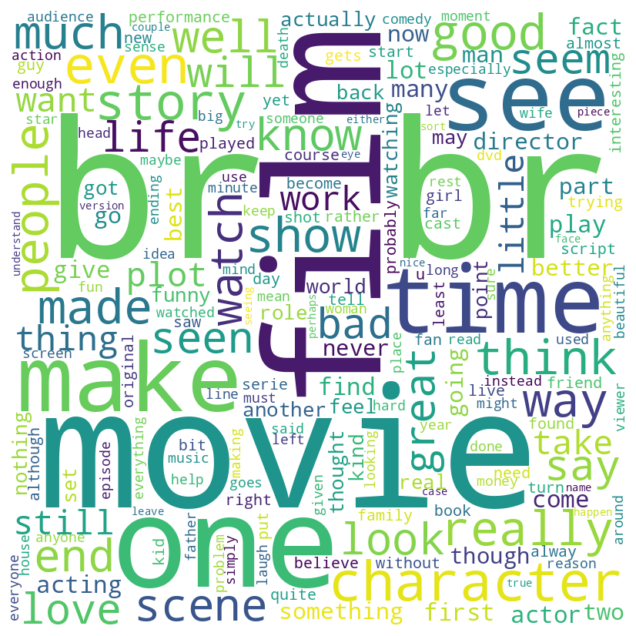

In [19]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This visualization helps in understanding the distribution of review lengths and provides insights into the text length variation across the dataset.

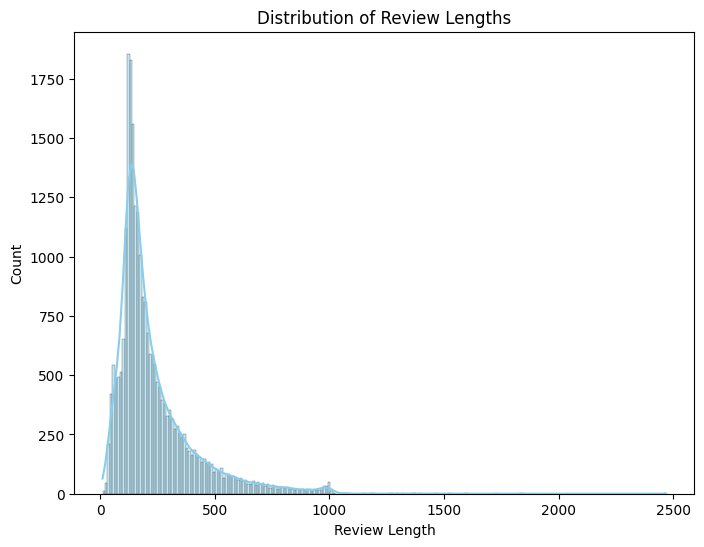

In [20]:
# Visualize the distribution of review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))  # Compute the length of each review in terms of the number of words
plt.figure(figsize=(8, 6))  # Create a figure with a specific size for the plot
sns.histplot(df['review_length'], kde=True, color='skyblue')  # Plot the distribution of review lengths using Seaborn histplot
plt.title('Distribution of Review Lengths')  # Set the title of the plot
plt.xlabel('Review Length')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


In [21]:
# Explore the most frequent words for each sentiment class
positive_reviews = df[df['sentiment'] == 'positive']['review']  # Extract reviews with 'positive' sentiment from the DataFrame
negative_reviews = df[df['sentiment'] == 'negative']['review']  # Extract reviews with 'negative' sentiment from the DataFrame


This visualization helps in gaining insights into the predominant themes or topics associated with positive sentiment reviews.

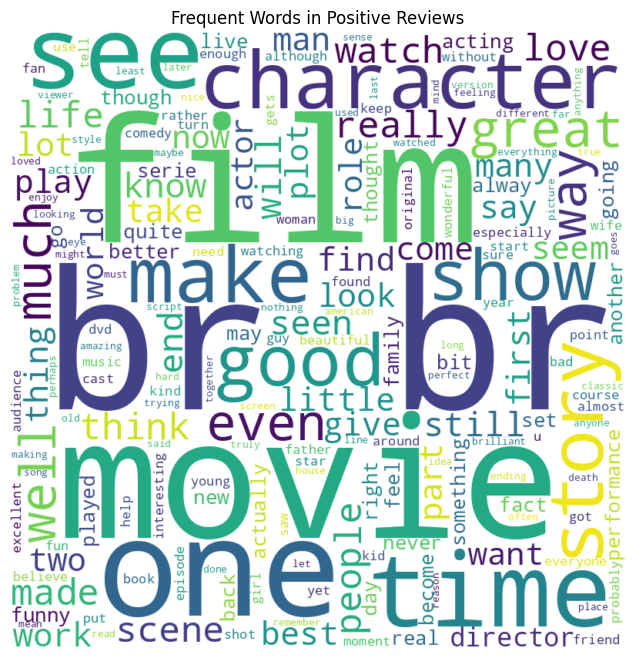

In [22]:
# Visualize the most frequent words in positive reviews
positive_word_freq = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(positive_reviews))  # Generate a word cloud based on the text data in positive_reviews
plt.figure(figsize=(8, 8), facecolor=None)  # Create a figure with a specific size for the plot
plt.imshow(positive_word_freq, interpolation='bilinear')  # Display the generated word cloud using Matplotlib
plt.title('Frequent Words in Positive Reviews')  # Set the title of the plot
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot


This visualization aids in understanding the prevalent themes or topics associated with negative sentiment reviews.

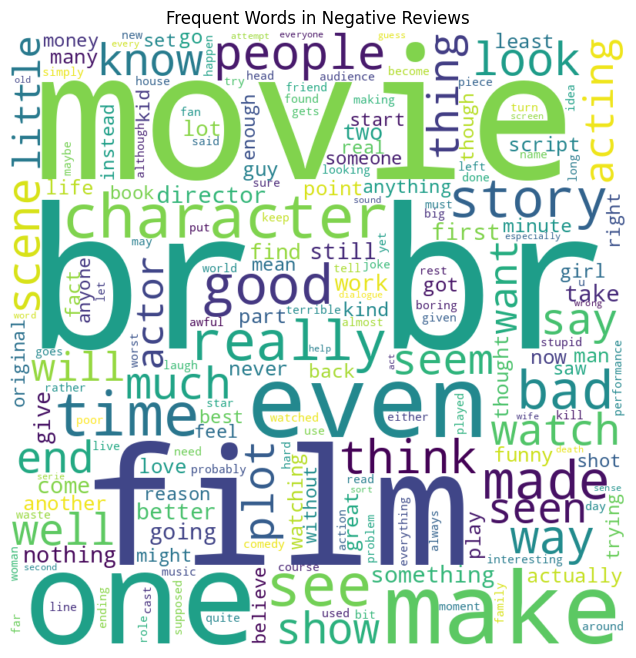

In [23]:
# Visualize the most frequent words in negative reviews
negative_word_freq = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(negative_reviews))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(negative_word_freq, interpolation='bilinear')
plt.title('Frequent Words in Negative Reviews')
plt.axis('off')
plt.show()

This plot helps in identifying potential relationships and dependencies between different variables in the dataset.

### **Data Preparation**
To ensure a clean and consistent dataset, we apply several preprocessing techniques, including lowercase conversion, removal of special characters and URLs, and lemmatization. These steps are crucial to ensure that the text data is uniform and suitable for subsequent analysis.

In [24]:
def remove_user_url(text):
    cleaned_text = re.sub(r'\b\w*user\w*\b|\b\w*url\w*\b', '', text, flags=re.IGNORECASE)
    return cleaned_text

# Use .loc to explicitly modify the 'safe_text' column in the original DataFrame
df['review'] = df['review'].apply(lambda x: remove_user_url(x))

In [25]:
def remove_special_characters(text):
    # Remove special characters, punctuation, and digits
    cleaned_text = re.sub(r'[^\w\s]|[\d]+', '', text)
    return cleaned_text

# Apply the function to the 'safe_text' column
df['review'] = df['review'].apply(remove_special_characters)

# # convert the 'safe_text' column to lowercase
# df['review'] = df['review'].str.lower()

In [26]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a text
def lemmatize_text(text):
    words = word_tokenize(text)  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'safe_text' column
df['review'] = df['review'].apply(lemmatize_text)

In [27]:
#  # Initialize the Porter Stemmer
# stemmer = PorterStemmer()

# # Function to perform stemming on a text
# def stem_text(text):
#     words = word_tokenize(text)
#     stemmed_words = [stemmer.stem(word) for word in words]  # Stem each word
#     return ' '.join(stemmed_words)  # Join the stemmed words back into a text

# # Apply stemming to the 'safe_text' column
# df['review'] = df['review'].apply(stem_text)

In [28]:
# Display a few examples for each sentiment class

# List of unique sentiment labels (positive, negative)
sentiment_labels = df['sentiment'].unique()

# Define the number of examples to display for each class
num_examples_per_class = 3

# Loop through each sentiment class
for label in sentiment_labels:
    # Filter the DataFrame for samples with the current sentiment label
    samples = df[df['sentiment'] == label]['review'].sample(num_examples_per_class)

    # Display the sentiment label and corresponding text samples
    print(f"Sentiment Label: {label}")
    for i, text in enumerate(samples):
        print(f"Example {i + 1}: {text}\n")

Sentiment Label: positive
Example 1: i know that there are some purist out there who poo poo anything that is not exactly like the original however sometimes spinoffs can stand on their own merit i like the new iron chef because it is similar enough to the japanese version but at the same time caters to american spirit i love alton brown a commentator because he explains thing with flair the iron chef themselves are very interesting i know the original were probably the best chef on the planet at the time but bobby flay is the only american iron chef to beat them mario batali seems to have the most fun when cooking making comment and being flashy while creating i have watched the series and find all the player work together well the judge are not always the best choice however there are a few exception like the lawyer turned foodie but most of the judge are questionable in being able to handle what is served i enjoy watching the chef hustle and the challenger are surprising the food at

In [29]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

In [30]:
train.head()

,review,sentiment,review_length
15006,i cant remember many detail about the show but...,positive,146
10110,of course flatley is already not exactly the i...,negative,97
24523,when it dvd wa released i came to market and b...,positive,192
2452,cashing in on the demonsmeetsclergy trend of t...,positive,193
15936,for those of you unfamiliar with jimmy stewart...,positive,241


In [31]:
eval.head()

,review,sentiment,review_length
6106,the matador is hitman movie liteif you can say...,positive,150
12473,br br burning paradise is a combination of neo...,positive,130
17907,after a long period in the space looking for t...,negative,244
8153,i bought this at tower record after seeing the...,negative,132
5431,i dont hand out ten star rating easily a movie...,positive,202


In [32]:
# Save splitted subsets

# Define the directory path relative to your script
output_directory = "Assets"

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Save splitted subsets
train.to_csv(os.path.join(output_directory, "train_subset.csv"), index=False)
eval.to_csv(os.path.join(output_directory, "eval_subset.csv"), index=False)


### **Modeling**
In the modeling phase, we train a sentiment analysis model using the BERT (Bidirectional Encoder Representations from Transformers) architecture. The model is fine-tuned with the preprocessed movie review dataset. We define training arguments such as the number of epochs, evaluation strategy, and other hyperparameters. After training, we evaluate the model's performance using metrics like accuracy and F1 score. Finally, we push the trained model and tokenizer to the Hugging Face model hub for future reference and deployment.

In [46]:
notebook_login()

In [34]:
dataset = load_dataset('csv',
    data_files={'train': 'Assets/train_subset.csv',
                'eval': 'Assets/eval_subset.csv'}, encoding="ISO-8859-1")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [35]:
# Load the RoBERTa tokenizer
# tokenizer = AutoTokenizer.from_pretrained('roberta-base')

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [36]:
# Define a function to transform labels for the new dataset
def transform_labels(example):
    sentiment = example['sentiment']
    if sentiment == 'negative':
        num = 0
    elif sentiment == 'positive':
        num = 1
    else:
        num = -1  # Handle other values as needed
    example['sentiment'] = num
    example['labels'] = num  # Add this line to set the 'labels' field
    return example


# # Define a function to tokenize the text using the "review" column
# def tokenize_data(example):
#     return tokenizer(example['review'], padding='max_length')

def tokenize_data(example):
    # Tokenize the text and truncate to the maximum length if it's longer
    return tokenizer(example['review'], truncation=True, max_length=512, padding='max_length')


# Transform labels for the new dataset
dataset = dataset.map(transform_labels)

# Tokenize the text using the "review" column and remove other columns
remove_columns = ['review']
dataset = dataset.map(tokenize_data, batched=True)
dataset = dataset.remove_columns(remove_columns)

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [37]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'review_length', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 20000
    })
    eval: Dataset({
        features: ['sentiment', 'review_length', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 5000
    })
})

In [38]:
# training_args = TrainingArguments(
#     "movie_review",
#     num_train_epochs=5,
#     load_best_model_at_end=True,
#     evaluation_strategy="steps",
#     save_strategy="steps",
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     learning_rate=2e-5,
#     weight_decay=0.01,
#     warmup_steps=500,
#     save_total_limit=5,
#     eval_steps=100,
#     save_steps=1000,
#     push_to_hub=True,
#      metric_for_best_model="accuracy",
# )

# Define training arguments
training_args = TrainingArguments(
    output_dir="./movie_sentiment",
    num_train_epochs=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=1000,
    load_best_model_at_end=True,
    # metric_for_best_model="eval_accuracy",
    push_to_hub=True,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [39]:
# Load the pre-trained RoBERTa model
# model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# Load the pre-trained BERT model
config = BertConfig.from_pretrained("bert-base-uncased", num_labels=2)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", config=config)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
train_dataset = dataset['train'].shuffle(seed=10)
eval_dataset = dataset['eval'].shuffle(seed=10)

In [41]:
# Insert the code to print dataset lengths
print(f"Train dataset length: {len(train_dataset)}")
print(f"Evaluation dataset length: {len(eval_dataset)}")

Train dataset length: 20000
Evaluation dataset length: 5000


In [42]:

# Define a function to compute accuracy for your new dataset
metric = load_metric("accuracy")

def compute_accuracy(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Adjust for your specific labels: "positive" and "negative"
    references = [1 if label == "positive" else 0 for label in labels]

    return metric.compute(predictions=predictions, references=references)

In [43]:
# Define a function to compute F1 score for the new dataset
def compute_f1_score(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    f1 = f1_score(labels, preds, average="weighted")
    return {"f1_score": f1}

In [47]:
# Create a Trainer for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_accuracy,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

In [ ]:
# Launch the learning process: training
trainer.train()

Step,Training Loss,Validation Loss


In [ ]:
# Launch the final evaluation
eval_metrics = trainer.evaluate()

print("***** Evaluation Metrics *****")
for key, value in eval_metrics.items():
    print(f"{key}: {value}")

In [ ]:
trainer.push_to_hub()

In [ ]:
model.push_to_hub("movie_sentiment")

In [ ]:
tokenizer.push_to_hub("movie_sentiment")